# Sales_Forecasting_m5 - Prophet model
Purpose:
Build a transparent, interpretable forecasting model for weekly store-level sales, and compare against SARIMA.

In [1]:
! pip install prophet


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 4.1 Import Libraries & Load Processed Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 4.2 Load processed store daily sales data
store_daily_sales = pd.read_csv(
    "../data/processed/store_daily_sales.csv",
    parse_dates=["date"]
)

c:\Users\Jacy Heather\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
# 4.3 Filter one store 
store_id = "CA_1"

store_ts = (
    store_daily_sales
    [store_daily_sales["store_id"] == store_id]
    .set_index("date")
)

In [4]:
# 4.4 Aggregate to weekly sales
weekly_sales = store_ts["sales"].resample("W").sum()

In [5]:
# 4.5 Train–Test Split (Time-Aware)
train_size = int(len(weekly_sales) * 0.8)

train = weekly_sales.iloc[:train_size]
test = weekly_sales.iloc[train_size:]

In [6]:
# 4.6 Prepare Prophet Training Data
prophet_train = train.reset_index()
prophet_train.columns = ["ds", "y"]

In [7]:
# 4.7 Initialize Prophet Model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

In [8]:
# 4.8 Fit Model (TRAIN ONLY)
model.fit(prophet_train)

17:23:18 - cmdstanpy - INFO - Chain [1] start processing
17:23:19 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
# 4.9 Create Future DataFrame (Test Horizon Only)
future = model.make_future_dataframe(
    periods=len(test),
    freq="W"
)

forecast = model.predict(future)

In [10]:
# 4.10 Extract Test Forecasts
forecast_test = forecast.iloc[-len(test):]

y_true = test.values
y_pred = forecast_test["yhat"].values

In [11]:
# 4.11 Compute Evaluation Metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"Prophet MAE: {mae:.2f}")
print(f"Prophet RMSE: {rmse:.2f}")

Prophet MAE: 1185.88
Prophet RMSE: 1506.02


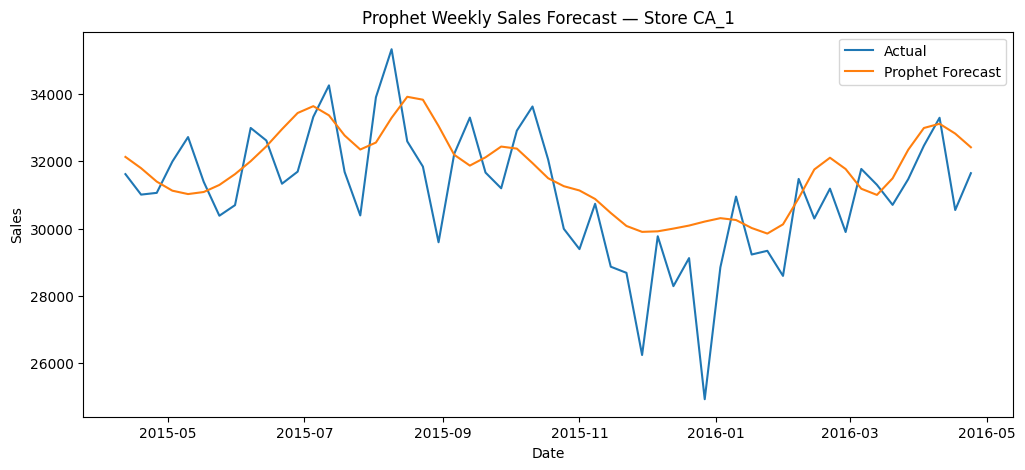

In [12]:
# 4.12 Plot Forecast vs Actual
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_true, label="Actual")
plt.plot(test.index, y_pred, label="Prophet Forecast")
plt.title(f"Prophet Weekly Sales Forecast — Store {store_id}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

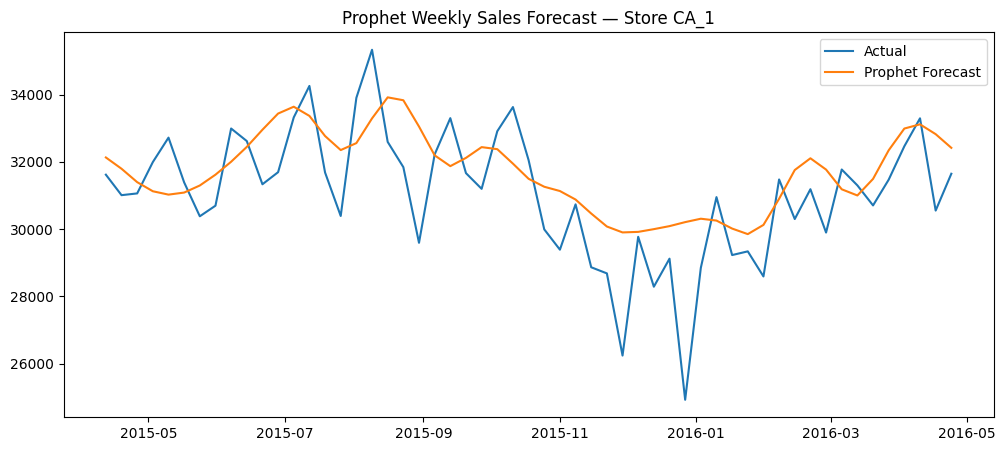

In [13]:
# 4.13 Save Key Visuals
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_true, label="Actual")
plt.plot(test.index, y_pred, label="Prophet Forecast")
plt.title(f"Prophet Weekly Sales Forecast — Store {store_id}")
plt.legend()

plt.savefig(
    "../visuals/prophet_forecast_CA_1.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


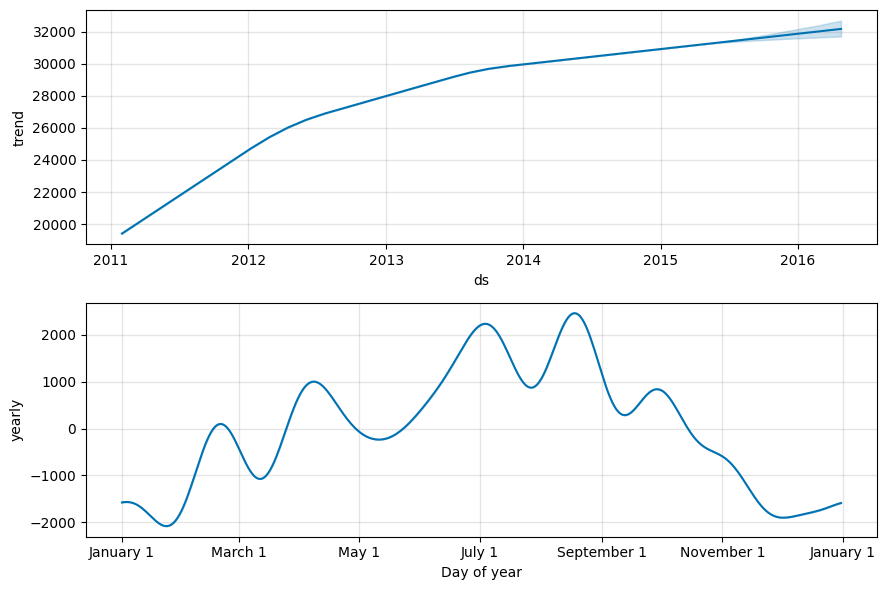

In [14]:
# 4.14 Prophet Components (Optional)
fig_components = model.plot_components(forecast)
plt.show()

fig_components.savefig(
    "../visuals/prophet_components_CA_1.png",
    dpi=300,
    bbox_inches="tight"
)